In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import json
from glob import glob

os.chdir('/home/kdoherty/spurge/data_release/results/epoch_tune_cutmix')

# List of file names
file_names = glob('*.csv')

# Load each CSV file into a DataFrame and concatenate them
df_list = [pd.read_csv(file_name) for file_name in file_names]
combined_df = pd.concat(df_list)

# Group by 'epoch' and calculate the mean accuracy
epoch_accuracy = combined_df.groupby('epoch')['epoch_acc'].mean()

# The result is a Series with the index as the epoch and the values as the mean accuracies
print(epoch_accuracy)

epoch
0      0.633068
1      0.679358
2      0.652051
3      0.644653
4      0.688765
         ...   
495    0.755166
496    0.772013
497    0.732047
498    0.759471
499    0.763935
Name: epoch_acc, Length: 500, dtype: float64


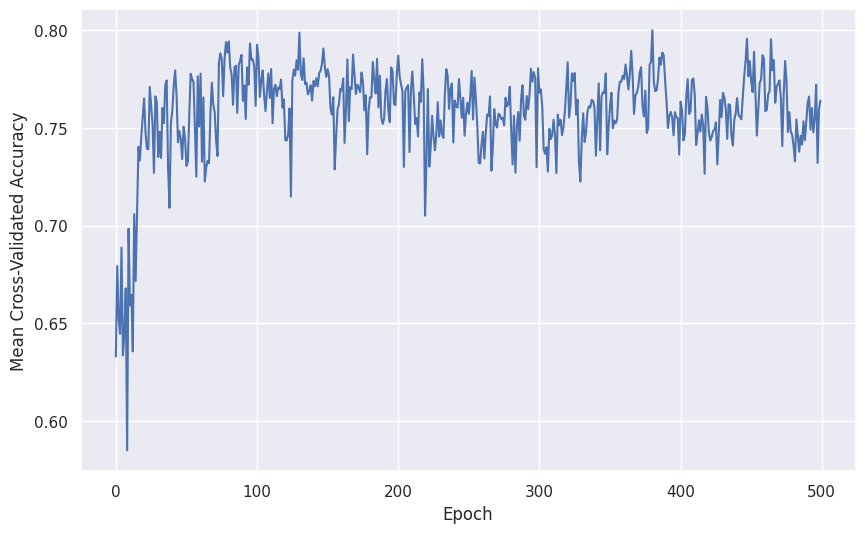

In [2]:
epoch_accuracy_df = epoch_accuracy.reset_index()

sns.set_theme(style="darkgrid")

# Create the line plot
plt.figure(figsize=(10, 6))
line_plot = sns.lineplot(data=epoch_accuracy_df, x='epoch', y='epoch_acc')

# Set the title and labels
line_plot.set_xlabel('Epoch')
line_plot.set_ylabel('Mean Cross-Validated Accuracy')

# Show the plot
plt.show()


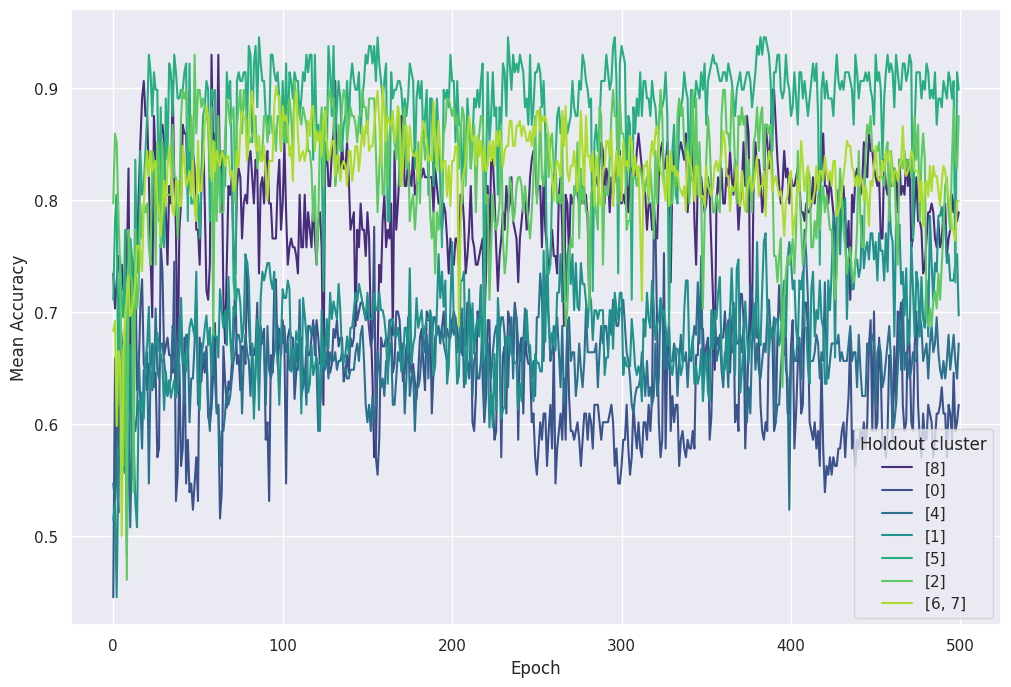

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize a figure
plt.figure(figsize=(12, 8))

# Load each CSV file into a DataFrame and concatenate them
all_data = pd.concat([pd.read_csv(file) for file in file_names], ignore_index=True)

# Group by both 'epoch' and 'array_idx' and calculate the mean accuracy
#grouped_data = all_data.groupby(['epoch', 'array_idx'])['epoch_acc'].mean().reset_index()

# Create the line plot
sns.lineplot(data=all_data, x='epoch', y='epoch_acc', hue='array_idx', palette="viridis")

# Set the title and labels
plt.xlabel('Epoch')
plt.ylabel('Mean Accuracy')

# Show the plot
plt.legend(title='Holdout cluster')
plt.show()



In [13]:
import numpy as np

best_epoch = np.argmax(epoch_accuracy) + 1

In [14]:
best_epoch

85

In [15]:
with open('/home/kdoherty/spurge/data_release/results/best_epoch_cutmix.json', 'w') as f:
    json.dump({'n_epochs':int(best_epoch)},f)